# Titanic Kaggle competition

Titanic datasets come from https://www.kaggle.com/c/titanic and is the most popular open kaggle competition.

It is my first real data set to practice data science skills. 

The work is done in jupyter and comes in stages:
1. Import and clean the data
2. feuture engineering to obtain new columns
3. basic statistics to recognize trends in data


Firstly I create environment by importing all neccesary packages.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.gridspec import GridSpec
import seaborn as sns

I saved files from website locally and read it from there. 

In [2]:
train = r'C:\Users\Lenovo\PycharmProjects\Kaggle\Project1_Titanic\data\train.csv'
test = r'C:\Users\Lenovo\PycharmProjects\Kaggle\Project1_Titanic\data\test.csv'

train_data = pd.read_csv(train)
test_data = pd.read_csv(test)


## Kaggle Data description

In [3]:
pd.read_clipboard()

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [4]:
train_data.head(10)
#train_data.shape
#train_data.isnull().sum()
#train_data.dtypes
#train_data.PassengerId.is_unique
#train_data.groupby('Survived')['PassengerId'].count()
#train_data.groupby('Pclass')['PassengerId'].count()
#train_data.groupby('Sex')['PassengerId'].count()
#train_data.Age.describe(); train_data.sort_values('Age')
#train_data.groupby('SibSp')['PassengerId'].count()
#train_data.groupby('Parch')['PassengerId'].count()
#train_data.Fare.describe()
#train_data.groupby(['Pclass', 'Cabin'])['PassengerId'].count()
#train_data.groupby(['Embarked', 'Pclass'])['PassengerId'].count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Test Data:
	1. 11 columns; 418 observations (Passengers)
	2. Each row is set to be different passenger.
	3. Null values: Age (86), Cabin (327), Fare (1)

In [5]:
test_data.head(10)
#test_data.shape
#test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Analyze Train set to test intuitive thoughts:
But furst let's check the amount of nulls
	1. Pclass has influence over Survived rate
	2. Sex --||--
	3. No of siblings --||--
	4. No of Parch --||--

In [6]:
print('-'*10, 'Number of Null Values for each dataset', '-'*10)
null_values = pd.concat([train_data.drop('Survived', axis=1).isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train', 'Test'])
null_values.query('Train !=0 | Test != 0')

---------- Number of Null Values for each dataset ----------


,Train,Test
Age,177,86
Fare,0,1
Cabin,687,327
Embarked,2,0


In [7]:
print('-'*10, 'Survival Rate per class', '-'*10)
train_data.groupby('Pclass')['Survived'].mean()

---------- Survival Rate per class ----------


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
print('-'*10, 'Survival Rate per Gender', '-'*10)
train_data.groupby('Sex')['Survived'].mean()

---------- Survival Rate per Gender ----------


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
print('-'*10, 'Survival Rate per No of Siblings/Spouse', '-'*10)
train_data.groupby('SibSp')['Survived'].mean()

---------- Survival Rate per No of Siblings/Spouse ----------


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [10]:
print('-'*10, 'Survival Rate per No of Parents/Children', '-'*10)
train_data.groupby('Parch')['Survived'].mean()

---------- Survival Rate per No of Parents/Children ----------


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [11]:
print('-'*10, 'Survival Rate per No of Embarked Port', '-'*10)
train_data.groupby('Embarked')['Survived'].mean()

---------- Survival Rate per No of Embarked Port ----------


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

## Clean Train and Test databases:
###	1. Fill Na:
	* Age = by calculating typical age range(mean +/- std) of this Sex and PClass as Higher class had much higher Age
	* Embarked = by the most common Embarked location
	* Fare = by median Fare value
	* Cabin will converted to boolean by feature engineering

In [12]:
print('-'*10, 'Start train_data.Age filling', '-'*10)
age_stat = train_data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'std'])

age_stat['start'] = age_stat['mean'] - age_stat['std']
age_stat['end'] = age_stat['mean'] + age_stat['std']
age_stat.drop(['mean', 'std'], axis=1, inplace=True)

train_data = pd.merge(train_data, age_stat, how='left', left_on=['Sex', 'Pclass'], right_index=True)
train_data['Age2'] = train_data.apply(lambda x: np.random.randint(x.start, x.end), axis=1)
train_data.Age.fillna(train_data.Age2, inplace=True)
train_data.drop(['start', 'end', 'Age2'], axis=1, inplace=True)

if train_data.Age.isnull().sum() == 0:
    print('-'*10, 'Cleaning train_data.Age complete', '-'*10)
else:
    print('-'*10, 'Cleaning train_data.Age complete but there are still Null values', '-'*10)

---------- Start train_data.Age filling ----------
---------- Cleaning train_data.Age complete ----------


In [13]:
print('-'*10, 'Start test_data.Age filling', '-'*10)
age_stat = test_data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'std'])

age_stat['start'] = age_stat['mean'] - age_stat['std']
age_stat['end'] = age_stat['mean'] + age_stat['std']
age_stat.drop(['mean', 'std'], axis=1, inplace=True)

test_data = pd.merge(test_data, age_stat, how='left', left_on=['Sex', 'Pclass'], right_index=True)
test_data['Age2'] = test_data.apply(lambda x: np.random.randint(x.start, x.end), axis=1)
test_data.Age.fillna(test_data.Age2, inplace=True)
test_data.drop(['start', 'end', 'Age2'], axis=1, inplace=True)

if test_data.Age.isnull().sum() == 0:
    print('-'*10, 'Cleaning test_data.Age complete', '-'*10)
else:
    print('-'*10, 'Cleaning test_data.Age complete but there are still Null values', '-'*10)

---------- Start test_data.Age filling ----------
---------- Cleaning test_data.Age complete ----------


In [14]:
print('-'*10, 'Cleaning train.Embarkment', '-'*10)
train_data.Embarked.fillna(train_data.Embarked.mode()[0], inplace=True)
if train_data.Embarked.isnull().sum() == 0:
    print('-'*10, 'Cleaning train_data.Embarked complete', '-'*10)
else:
    print('-'*10, 'Cleaning train_data.Embarked complete but there are still Null values', '-'*10)

---------- Cleaning train.Embarkment ----------
---------- Cleaning train_data.Embarked complete ----------


In [15]:
print('-'*10, 'Cleaning test_data.Fare', '-'*10)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)
if test_data.Fare.isnull().sum() == 0:
    print('-'*10, 'Cleaning test_data.Fare complete', '-'*10)
else:
    print('-'*10, 'Cleaning test_data.Fare complete but there are still Null values', '-'*10)

---------- Cleaning test_data.Fare ----------
---------- Cleaning test_data.Fare complete ----------


## Plot data for betten understanding
#### In order to make prediction of survival Rate we need to first observe trends in data. In order to do it, I will plot the Survived and not Survived Passengers by Age, Class and Gender. 


### Histogram Analysis
1. First Histogram of Age, supports my feeling that older passengers had slightly lower Survival Rate than younger. However, it needs further analysis of other variables.
* When we look at each passenger class separatly, it further shows that the age of passengers where determinant in each class.
* When we look at each passenger gender separatly, we don't see any that would mean that e.g. younger women are more likely to be survive than older. 
#### Summary
If we are looking separatly at distrbutions of those who survived and didn't we don't see very clear trends, but the fact that younger memberts in each class and gender weremore likely to survive

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


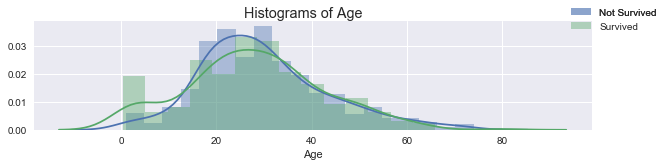

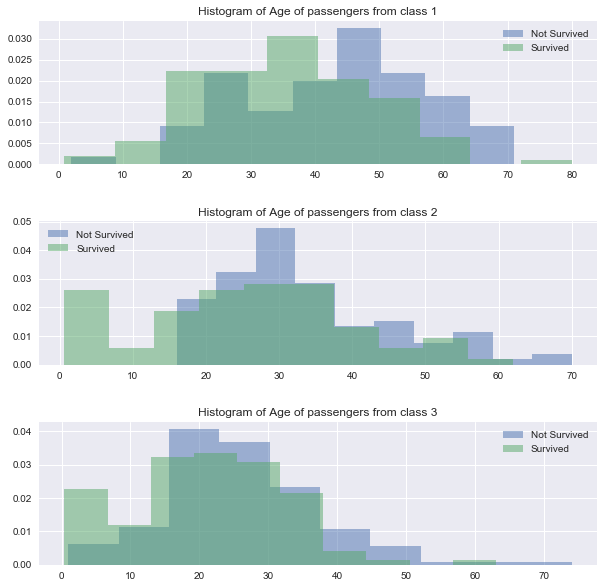

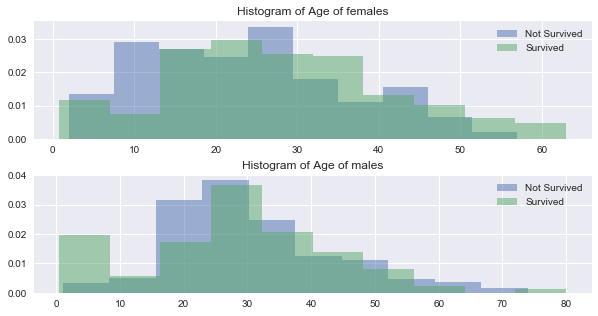

In [119]:
# Initial settings
sns.set()
survived_func = lambda x: 'Survived' if x==1 else 'Not Survived'
gender_func = lambda x: 0 if x == 'female' else 1

# 1 hist
fig = plt.figure(figsize=(10, 2))
ax = plt.axes()
for survived in range(2):
    fig = sns.distplot(train_data.query('Survived == @survived')['Age'], label=survived_func(survived))
    fig.figure.suptitle('Histograms of Age')
    fig.figure.legend()
    
# 2 hist: Age per Class
'-'* 50
fig, ax = plt.subplots(3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4)
for pclass in range(3):
    for survived in range(2):
        ax[pclass].hist(train_data.query('Survived == @survived & Pclass == @pclass + 1')['Age'], 
                        alpha=0.5, histtype='stepfilled', label=survived_func(survived), density=True)
        ax[pclass].legend()
        ax[pclass].set(title='Histogram of Age of passengers from class {0}'.format(pclass + 1))

# 3 hist: Age per Gender
'-'* 50
fig, ax = plt.subplots(2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.3)
for gender in ['female', 'male']:
    for survived in range(2):
        ax[gender_func(gender)].hist(train_data.query('Survived == @survived & Sex == @gender')['Age'], 
                        alpha=0.5, histtype='stepfilled', label=survived_func(survived), density=True)
        ax[gender_func(gender)].legend()
        ax[gender_func(gender)].set(title='Histogram of Age of {0}s'.format(gender))


### Histogram Analysis #2
While density functions didn't give a clear view into the relationships between Age and Survival of different groups of passengers, when we look at the passenger count per those categories we can see more patterns. 

**Insights**
1. Women from 1st n 2nd class has survived in majority - this will be big determent in predicting model
* Men from 1st class had survived more likely when young
* Men from 2nd class had almost didn't survive
* Men from 3rd class had almost didn't survive

Also, it would be good to see if males in class first and second If they have something in common 

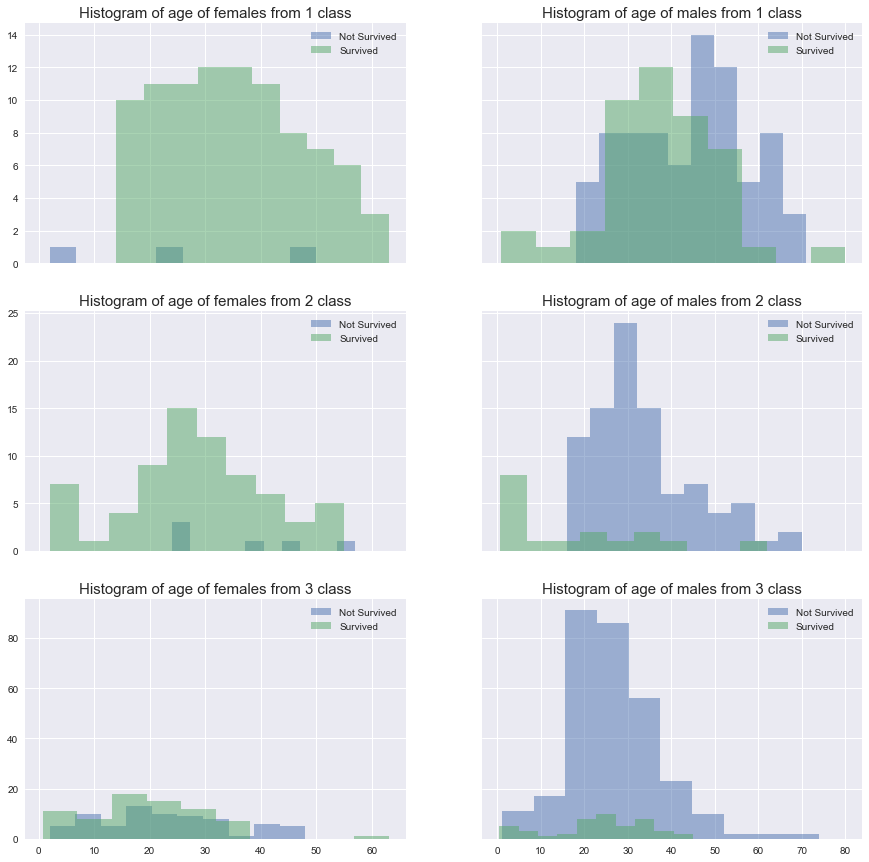

In [204]:
survived_func = lambda x: 'Survived' if x==1 else 'Not Survived'
gender_func = lambda x: 0 if x == 'female' else 1

fig, ax = plt.subplots(3, 2,figsize=(15, 15), sharex='col', sharey='row')

for pclass in range(3):
    for gender in ['female', 'male']:
        for survived in range(2):
            ax[pclass, gender_func(gender)].hist(train_data.query('Survived == @survived & Sex == @gender & Pclass == @pclass + 1')['Age'],
                                                 alpha=0.5, histtype='stepfilled', label=survived_func(survived))#, density=True)
            ax[pclass, gender_func(gender)].legend()
            ax[pclass, gender_func(gender)].set_title('Histogram of age of {0}s from {1} class'.format(gender, pclass + 1), fontsize=15)

### PIE CHARTS
The Summary of above approach and findings can be seen in pie charts below.


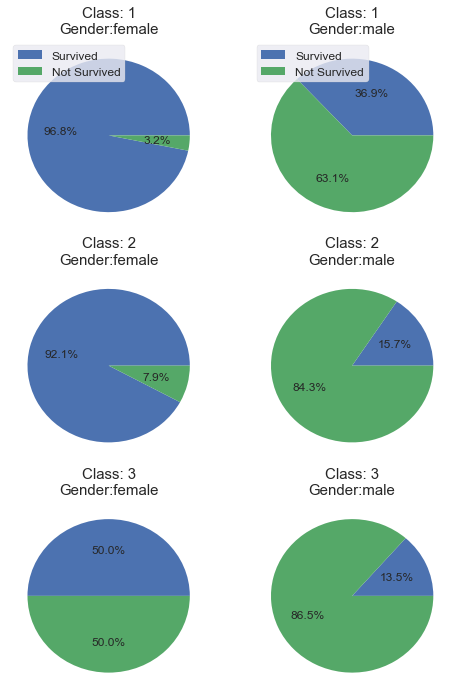

In [225]:
survived = train_data.groupby('Pclass')['Survived'].mean()[1]
gender_func = lambda x: 0 if x == 'female' else 1

fig = plt.figure(figsize=(8, 12))
grid = plt.GridSpec(3, 2, hspace=0.2, wspace=0.2)
labels = ['Survived', 'Not Survived']
for pclass in range(3):
    for gender in ['female', 'male']:
        pie = fig.add_subplot(grid[pclass, gender_func(gender)])
        survived = train_data.query('Pclass == @pclass + 1 & Sex == @gender')['Survived'].mean()
        patches, texts, autotexts = pie.pie([survived, 1 - survived], autopct='%1.1f%%')
        pie.set_title('Class: {0}\nGender:{1}'.format(pclass+1, gender), fontsize=15)
        for t in texts:
            t.set_fontsize(12)
        for t in autotexts:
            t.set_fontsize(12)
        if pclass == 0 : pie.legend(patches, labels, loc='upper left', fontsize='medium', frameon=True)
          
#fig.suptitle('Survival Rate per category', fontsize=20, fontweight='bold', horizontalalignment='right')

## Enigneer new features:
1. Build a bool if passenger had a cabin
* Change Embarked to be a int
* Change Sex to be int
* Create Title from Name column
* IsAlone column has been created
* Delete Ticket and Fare columns

In [13]:
train_data['isCabin'] = train_data.Cabin.apply(lambda x: 1 if pd.isnull(x) == False else 0)
train_data.drop('Cabin', axis=1, inplace=True)

test_data['isCabin'] = test_data.Cabin.apply(lambda x: 1 if pd.isnull(x) == False else 0)
test_data.drop('Cabin', axis=1, inplace=True)

print('-'*10, 'isCabin column has been created', '-'*10)

---------- isCabin column has been created ----------


In [14]:
def emb_int(x):
    if x == 'C':
        return 3
    elif x == 'Q':
        return 2
    elif x == 'S':
        return 1
    else:
        return 0

train_data['Embarked'] = train_data.Embarked.apply(emb_int)
test_data['Embarked'] = test_data.Embarked.apply(emb_int)

Embarked_rep = {3: 'C', 2: 'Q', 1: 'S', 0: 'other'}
print('-'*10, 'Embarked has been motified to be represented as integer. Desc in Embarked_rep variable', '-'*10)

---------- Embarked has been motified to be represented as integer. Desc in Embarked_rep variable ----------


In [14]:
train_data['Sex'] = train_data.Sex.apply(lambda x: 1 if x == 'female' else 0)
test_data['Sex'] = test_data.Sex.apply(lambda x: 1 if x == 'female' else 0)

print('-'*10, 'Sex column has been modified. 1 is female; 0 is male', '-'*10)

---------- Sex column has been modified. 1 is female; 0 is male ----------


In [16]:
def Name_int(x):
    if 'Mr' in x or 'Master' in x or 'Rev' in x or 'Dr' in x or 'Capt' in x or 'Major' in x or 'Don' in x:
        return 1
    elif 'Mrs' in x:
        return 2
    elif 'Miss' in x:
        return 3
    else:
        return 0

train_data['Title'] = train_data.Name.apply(Name_int)
train_data.drop('Name', axis=1, inplace=True)
test_data['Title'] = test_data.Name.apply(Name_int)
test_data.drop('Name', axis=1, inplace=True)

Title_rep = {3: 'Miss', 2: 'Mrs', 1: ['Mr', 'Master', 'Rev', 'Dr', 'Capt', 'Major', 'Don'], 0: 'Other'}
print('-'*10, 'Title has been created from Name field. Desc in Title_rep variable', '-'*10)

---------- Title has been created from Name field. Desc in Title_rep variable ----------


In [16]:
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('Fare', axis=1, inplace=True)

test_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Fare', axis=1, inplace=True)

print('-'*10, 'Ticket and Fare columns have been deleted', '-'*10)

---------- Ticket and Fare columns have been deleted ----------


In [18]:
train_data['isAlone'] = train_data.apply(lambda x: 1 if x.SibSp == 0 and x.Parch == 0 else 0, axis=1)
test_data['isAlone'] = test_data.apply(lambda x: 1 if x.SibSp == 0 and x.Parch == 0 else 1, axis=1)

print('-'*10, 'isAlone column has been created', '-'*10)

---------- isAlone column has been created ----------


In [19]:
train_data['AgeBuckets'], bins = pd.cut(train_data.Age, 6, labels=[1, 2, 3, 4, 5, 6], retbins=True)
test_data['AgeBuckets'] = pd.cut(test_data.Age, bins=bins, labels=[1, 2, 3, 4, 5, 6])
AgeBuckets = {1: [bins[0], bins[1]], 2: [bins[1], bins[2]], 3: [bins[2], bins[3]], 4: [bins[3], bins[4]], 5: [bins[4], bins[5]], 6: [bins[5], bins[6]]}
train_data.drop('Age', axis=1, inplace=True)
test_data.drop('Age', axis=1, inplace=True)

print('-'*10, 'Age Buckets created. Bins saved in variable= AgeBuckets.', '-'*10)

---------- Age Buckets created. Bins saved in variable= AgeBuckets. ----------


In [21]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch

print('-'*10, 'FamilySize has been created.', '-'*10)

---------- FamilySize has been created. ----------


In [22]:
train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

print('-'*10, 'Passenger Id removed from datasets.', '-'*10)

---------- Passenger Id removed from datasets. ----------


## Advance analysis


In [42]:
train_data.groupby(['Sex', 'Title', 'Pclass'])['Survived'].describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Title</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">0</th>
      <th>0</th>
      <th>1</th>
      <td>3.0</td>
      <td>0.333333</td>
      <td>0.577350</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.5</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>119.0</td>
      <td>0.369748</td>
      <td>0.484778</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>108.0</td>
      <td>0.157407</td>
      <td>0.365882</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>347.0</td>
      <td>0.135447</td>
      <td>0.342694</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">1</th>
      <th rowspan="2" valign="top">0</th>
      <th>1</th>
      <td>3.0</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>45.0</td>
      <td>0.977778</td>
      <td>0.149071</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>43.0</td>
      <td>0.883721</td>
      <td>0.324353</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>43.0</td>
      <td>0.511628</td>
      <td>0.505781</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">3</th>
      <th>1</th>
      <td>46.0</td>
      <td>0.956522</td>
      <td>0.206185</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>32.0</td>
      <td>0.968750</td>
      <td>0.176777</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>101.0</td>
      <td>0.495050</td>
      <td>0.502469</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [44]:
train_data.pivot_table('Survived', index=['Sex', 'Pclass'], columns='FamilySize', margins=True)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>FamilySize</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>10</th>
      <th>All</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">0</th>
      <th>1</th>
      <td>0.333333</td>
      <td>0.387097</td>
      <td>0.454545</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>0.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.368852</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.097222</td>
      <td>0.066667</td>
      <td>0.470588</td>
      <td>0.250000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.157407</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.121212</td>
      <td>0.178571</td>
      <td>0.320000</td>
      <td>0.333333</td>
      <td>0.0</td>
      <td>0.000000</td>
      <td>0.250000</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.135447</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>0.970588</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>0.500000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.968085</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.906250</td>
      <td>0.894737</td>
      <td>0.928571</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.921053</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.616667</td>
      <td>0.517241</td>
      <td>0.545455</td>
      <td>0.833333</td>
      <td>0.0</td>
      <td>0.000000</td>
      <td>0.375000</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.500000</td>
    </tr>
    <tr>
      <th>All</th>
      <th></th>
      <td>0.303538</td>
      <td>0.552795</td>
      <td>0.578431</td>
      <td>0.724138</td>
      <td>0.2</td>
      <td>0.136364</td>
      <td>0.333333</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.383838</td>
    </tr>
  </tbody>
</table>
</div>

In [45]:
train_data.pivot_table('Survived', index=['Sex', 'Pclass'], columns='FamilySize', aggfunc='count', margins=True)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>FamilySize</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>10</th>
      <th>All</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">0</th>
      <th>1</th>
      <td>75.0</td>
      <td>31.0</td>
      <td>11.0</td>
      <td>3.0</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>122</td>
    </tr>
    <tr>
      <th>2</th>
      <td>72.0</td>
      <td>15.0</td>
      <td>17.0</td>
      <td>4.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>108</td>
    </tr>
    <tr>
      <th>3</th>
      <td>264.0</td>
      <td>28.0</td>
      <td>25.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>12.0</td>
      <td>4.0</td>
      <td>4.0</td>
      <td>4.0</td>
      <td>347</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">1</th>
      <th>1</th>
      <td>34.0</td>
      <td>39.0</td>
      <td>13.0</td>
      <td>4.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>94</td>
    </tr>
    <tr>
      <th>2</th>
      <td>32.0</td>
      <td>19.0</td>
      <td>14.0</td>
      <td>9.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>76</td>
    </tr>
    <tr>
      <th>3</th>
      <td>60.0</td>
      <td>29.0</td>
      <td>22.0</td>
      <td>6.0</td>
      <td>9.0</td>
      <td>5.0</td>
      <td>8.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>144</td>
    </tr>
    <tr>
      <th>All</th>
      <th></th>
      <td>537.0</td>
      <td>161.0</td>
      <td>102.0</td>
      <td>29.0</td>
      <td>15.0</td>
      <td>22.0</td>
      <td>12.0</td>
      <td>6.0</td>
      <td>7.0</td>
      <td>891</td>
    </tr>
  </tbody>
</table>
</div>